### Darlene Phan
August 11, 2022<br>
Project 2

In [1]:
#imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../Data/wines_SPA.csv')
df.head()

,winery,wine,year,rating,num_reviews,country,region,price,type,body,acidity
0,Teso La Monja,Tinto,2013,4.9,58,Espana,Toro,995.00,Toro Red,5.0,3.0
1,Artadi,Vina El Pison,2018,4.9,31,Espana,Vino de Espana,313.50,Tempranillo,4.0,2.0
2,Vega Sicilia,Unico,2009,4.8,1793,Espana,Ribera del Duero,324.95,Ribera Del Duero Red,5.0,3.0
3,Vega Sicilia,Unico,1999,4.8,1705,Espana,Ribera del Duero,692.96,Ribera Del Duero Red,5.0,3.0
4,Vega Sicilia,Unico,1996,4.8,1309,Espana,Ribera del Duero,778.06,Ribera Del Duero Red,5.0,3.0


In [3]:
df.shape

(7500, 11)

In [4]:
#Changing categorical values of N.V. to nan. 
#NV stands for non vintage. Since this doesn't fall in line with the other int in this column its best to drop so we don't have mixed data.
df['year'] = df['year'].replace('N.V.', np.NaN)

In [5]:
df.year.unique()

array(['2013', '2018', '2009', '1999', '1996', '1998', '2010', '1995',
       '2015', '2011', '2016', '1970', '1946', '1962', '2019', '2004',
       nan, '1931', '1979', '2005', '2020', '2014', '1985', '1929',
       '2007', '2012', '2017', '2008', '2006', '2000', '2003', '2002',
       '1991', '1994', '1990', '1989', '1987', '1986', '1981', '2001',
       '1968', '1964', '1982', '1974', '1983', '1955', '1980', '1972',
       '1953', '1958', '1942', '1965', '1992', '1973', '1997', '1967',
       '1975', '1910', '1961', '1954', '1988', '1969', '1951', '1928',
       '1976', '1949', '2021', '1959', '1922', '1978', '1925'],
      dtype=object)

In [6]:
#checking and dropping duplicates
df.duplicated().sum()
df.drop_duplicates(inplace=True)

In [7]:
#checking for null/missing values
df.isnull().sum()

winery           0
wine             0
year            72
rating           0
num_reviews      0
country          0
region           0
price            0
type           106
body           271
acidity        271
dtype: int64

In [8]:
#dropping missing values in year as discussed earlier. 
#Dropping type, because that's not something should be imputed since it greatly impacts the possible rating of the wine
df.dropna(subset=['type','year'], inplace=True)

In [9]:
#confirming 'type' and 'year' columns have been dropped
#'body' and 'acidity' will be handled differently
df.isnull().sum()

winery           0
wine             0
year             0
rating           0
num_reviews      0
country          0
region           0
price            0
type             0
body           163
acidity        163
dtype: int64

In [10]:
#Correcting object type after dropping duplicates
df['year'] = df['year'].astype(int)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1877 entries, 0 to 6100
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   winery       1877 non-null   object 
 1   wine         1877 non-null   object 
 2   year         1877 non-null   int64  
 3   rating       1877 non-null   float64
 4   num_reviews  1877 non-null   int64  
 5   country      1877 non-null   object 
 6   region       1877 non-null   object 
 7   price        1877 non-null   float64
 8   type         1877 non-null   object 
 9   body         1714 non-null   float64
 10  acidity      1714 non-null   float64
dtypes: float64(4), int64(2), object(5)
memory usage: 176.0+ KB


In [12]:
#Delete unnecessary colums
df = df.drop(columns=['num_reviews'])
df

,winery,wine,year,rating,country,region,price,type,body,acidity
0,Teso La Monja,Tinto,2013,4.9,Espana,Toro,995.00,Toro Red,5.0,3.0
1,Artadi,Vina El Pison,2018,4.9,Espana,Vino de Espana,313.50,Tempranillo,4.0,2.0
2,Vega Sicilia,Unico,2009,4.8,Espana,Ribera del Duero,324.95,Ribera Del Duero Red,5.0,3.0
3,Vega Sicilia,Unico,1999,4.8,Espana,Ribera del Duero,692.96,Ribera Del Duero Red,5.0,3.0
4,Vega Sicilia,Unico,1996,4.8,Espana,Ribera del Duero,778.06,Ribera Del Duero Red,5.0,3.0
...,...,...,...,...,...,...,...,...,...,...
2046,Mustiguillo,Finca Terrerazo,2017,4.2,Espana,El Terrerazo,24.45,Red,4.0,3.0
2047,Matarromera,Gran Reserva,2011,4.2,Espana,Ribera del Duero,64.50,Ribera Del Duero Red,5.0,3.0
2048,Sei Solo,Preludio,2016,4.2,Espana,Ribera del Duero,31.63,Ribera Del Duero Red,5.0,3.0
2049,Vinedos de Paganos,El Puntido,2005,4.2,Espana,Rioja,73.00,Rioja Red,4.0,3.0


In [13]:
df.describe()

,year,rating,price,body,acidity
count,1877.000000,1877.000000,1877.000000,1714.000000,1714.000000
mean,2010.869473,4.404688,142.612586,4.263127,2.928238
std,11.300344,0.148552,282.560181,0.660949,0.313328
min,1910.000000,4.200000,6.260000,2.000000,1.000000
25%,2010.000000,4.300000,32.550000,4.000000,3.000000
50%,2015.000000,4.400000,55.140000,4.000000,3.000000
75%,2017.000000,4.500000,117.300000,5.000000,3.000000
max,2021.000000,4.900000,3119.080000,5.000000,3.000000


In [14]:
#copy for machine learning
df_ml = df.copy()

In [15]:
#imputing mean for viz. Using this method because it makes more sense to fill it with an average to not skew the current data.
df['body'] = df['body'].fillna(round(df['body'].mean()))
df['acidity'] = df['acidity'].fillna(round(df['acidity'].mean()))

## Exploratory Data Viz
Univariate visuals for the target and all features

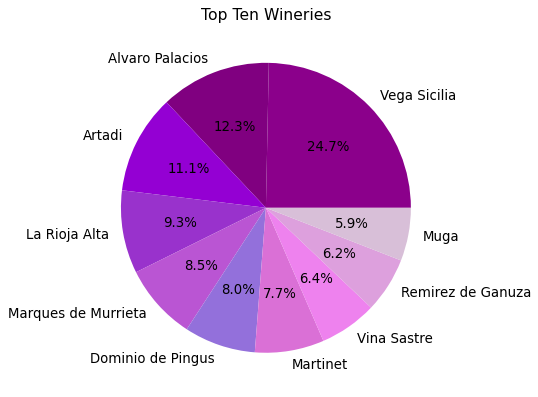

In [16]:
#Visualizing the top 10 Wineries
plt.figure(figsize=(8, 6), dpi=80)
c=['darkmagenta', 'purple', 'darkviolet', 'darkorchid', 'mediumorchid','mediumpurple', 'orchid', 'violet', 'plum', 'thistle']
df.winery.value_counts().sort_values(ascending=False).head(10).plot(kind='pie', 
                                                                    autopct='%1.1f%%', 
                                                                    colors=c,
                                                                    fontsize=12)
plt.ylabel('')
plt.title('Top Ten Wineries', fontsize=14)
plt.show()

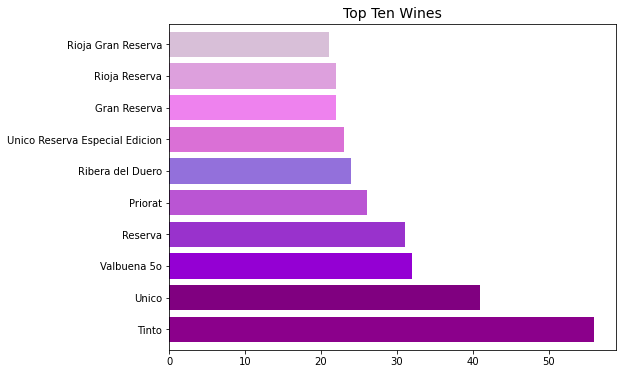

In [17]:
#top ten wines
plt.figure(figsize=(8, 6))
df.wine.value_counts(ascending=False).head(10).plot(kind='barh', width=.8, color=c)
plt.ylabel('')
plt.title('Top Ten Wines', fontsize=14)
plt.show()

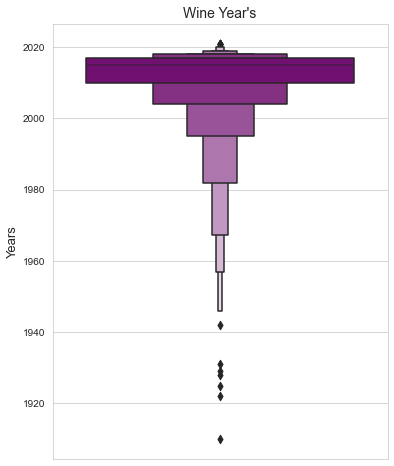

In [18]:
#Our first numerical column. Checking for outliers since years have a lot of different vintages
plt.figure(figsize=(6,8))
sns.set_style('whitegrid')
sns.boxenplot(data=df, y='year', color='purple')
plt.title("Wine Year's", fontsize=14)
plt.ylabel('Years', fontsize=13)
plt.show()

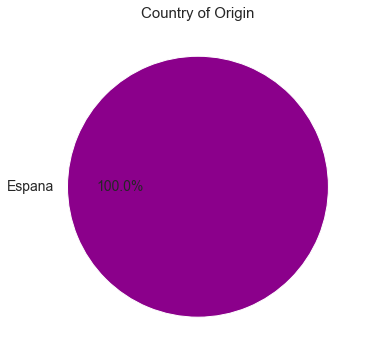

In [19]:
#lol, I'll be deleting this row. This was for my own amusement. 
#HOWEVER, 100% of the wines come from Spain. 
plt.figure(figsize=(8, 6))
df.country.value_counts().plot(kind='pie', autopct='%1.1f%%', fontsize=14, colors=c)
plt.ylabel(' ')
plt.title('Country of Origin', fontsize=15)
plt.show()

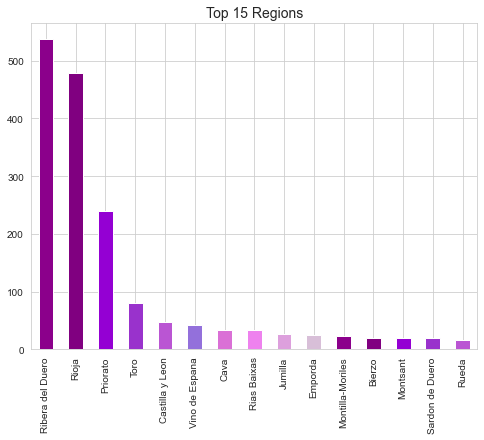

In [20]:
#Interesting, turns out that the top regions for wine are taken up by 3 areas. 
plt.figure(figsize=(8, 6))
df.region.value_counts().head(15).plot(kind='bar', color=c)
plt.title('Top 15 Regions', fontsize=14)
plt.show()

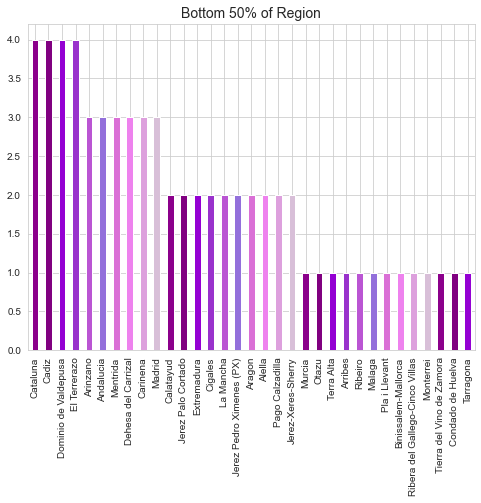

In [21]:
#A deeper dive shows us that the lower 50% has less that 5 wines per reigon. Which means the top 3 are majority outliers. 
#Curious as to how many unique wineries are in these locations and how many of them are mass produced.
plt.figure(figsize=(8, 6))
df.region.value_counts().tail(33).plot(kind='bar', color=c)
plt.title('Bottom 50% of Region', fontsize=14)
plt.show()

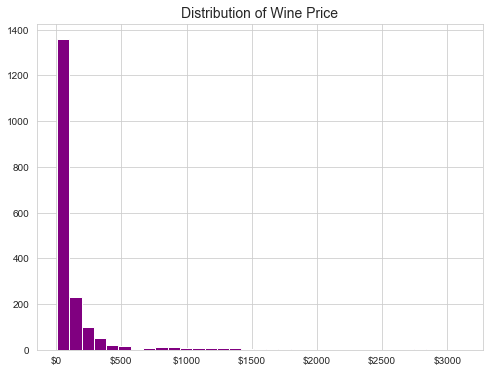

In [22]:
#Majority of wines fall within the 0-125 dollar range. Everything above 350 is an outlier. 
fig, ax = plt.subplots(figsize=(8, 6))
n_bins = 33
ax.hist(df['price'], 
        n_bins, 
        color='purple',
        histtype ='bar')
plt.title('Distribution of Wine Price', fontsize=14)
ax.xaxis.set_major_formatter('${x:1.0f}')
plt.show()

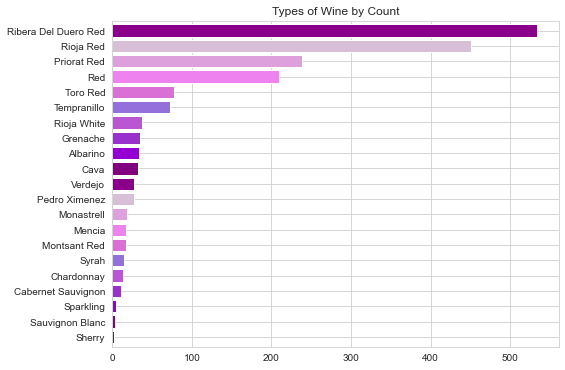

In [23]:
# Types of wine had the least categories out of all the categorical columns. I was able to plot all of them without it visually being 
#overwhelming. Majority of the wines in this data set are red wines, hence the purplish color palette. 
plt.figure(figsize=(8, 6))
df.type.value_counts().sort_values(ascending=True).plot(kind='barh', width=.8, color=c)
plt.title('Types of Wine by Count')
plt.show()

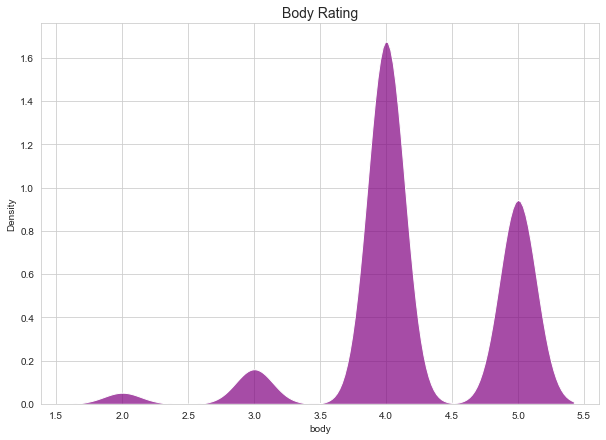

In [24]:
#Majority are med to full body
plt.figure(figsize=(10,7))
sns.kdeplot(data=df, x="body", multiple='stack', color='purple', alpha=.7)
plt.title('Body Rating', fontsize=14)
plt.show()

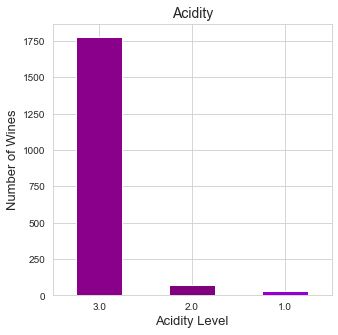

In [25]:
#Turns out the majority of wines are more acidic. 
plt.figure(figsize=(5,5))
df['acidity'].value_counts().plot(kind='bar', color=c, width=.5)
plt.title('Acidity', fontsize=14)
plt.xlabel('Acidity Level', fontsize=13)
plt.xticks(rotation=0)
plt.ylabel('Number of Wines', fontsize=13)
plt.show()

### The target

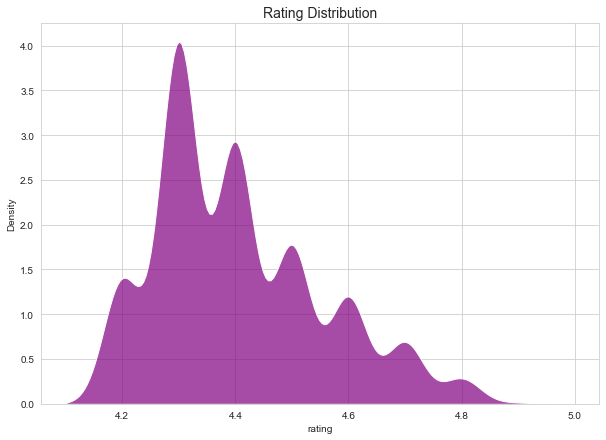

In [26]:
#Distribution of wine rating. All are between 4.1-5.0
sns.set_style('whitegrid')
plt.figure(figsize=(10,7))
sns.kdeplot(data=df, x="rating", multiple='stack', color='purple', alpha=.7)
plt.title('Rating Distribution', fontsize=14)
plt.show()

I have 15+ years of hospitality experience, and was able to correlate what I already knew about Spanish wines to these visuals. It was not surprising to find out that majority of Spanish wines have higher acidity levels(great for cutting through fatty foods), medium-full body (will hold up against food) and natrually very good mean rating between 4.3 - 4.7. 

Most wines are enjoyed with food. Since Spanish wines have characteristics that allow them to stand up to food and not be washed out, it's understandable why the majority of these ratings are as high as they are. I always knew, Spanish wines were great with food, I never realized that the majority of them had similar characteristics regardless of types or reigons. Situations like this is where my domain expertise will shine.